# Atividade 2
## Revisão de probabilidade

In [1]:
# Imports
from IPython.display import display, Markdown
from matplotlib_venn import venn3

import numpy as np
import scipy.integrate as integrate
import scipy.optimize as optimize
import scipy.stats as scipy_stats
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

import statistics
import math
import utils

---
### 1. Os diâmetros de oito mancais selecionados ao acaso são os seguintes (em mm):
    50,001 50,002 49,998 50,006 50,005 49,996 50,003 50,004

a.  Calcule a média amostral. <br>
b.  Calcule o desvio-padrão amostral.

In [24]:
diametros_mancais = [50.001, 50.002, 49.998, 50.006, 50.005, 49.996, 50.003, 50.004]
media = statistics.mean(diametros_mancais)
desvio_padrao = statistics.stdev(diametros_mancais)

Markdown(
    f'a. Média amostral é {media:.4f} <br>'
    f'b. Desvio-padrão amostral é {desvio_padrao:.4f}'
    )

a. Média amostral é 50.0019 <br>b. Desvio-padrão amostral é 0.0034

---
### 2. O tempo de vida até falhar em horas de um componente eletrônico sujeito a um teste de durabilidade acelerado é mostrado abaixo para uma amostra com tamanho n = 40. Para acelerar a falha no teste, as unidades experimentais são testadas sob uma temperatura elevada.
        127 125 131 124 129 121 142 151 160 125
        124 123 120 119 128 133 137 124 142 123
        121 136 140 137 125 124 128 129 130 122
        118 131 125 133 141 125 140 132 129 126
a. Calcule a média amostral e o desvio-padrão.
b. Construa o histograma.
c. Ache a mediana e os quartis. 

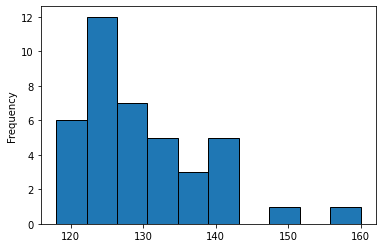

In [3]:
tempos_de_vida = utils.ler_quadro_txt_como_serie("datasets/Atividade2-Exercicio2.txt")
media = tempos_de_vida.mean()
desvio_padrao = tempos_de_vida.std()

Markdown(
    f'a. A média amostral é {media:.2f} horas e o desvio padrão é {desvio_padrao:.2f} horas <br>'
    f'b. Histograma: <br>'
)
tempos_de_vida.plot.hist(ec="black");

In [4]:
quartis = tempos_de_vida.quantile([.25, .5, .75])
Markdown(f'c. Quartis são:')
quartis

0.25    124.00
0.50    128.00
0.75    133.75
dtype: float64

---

### 3) Os dados abaixo são leituras do rendimento de um processo químico em dias sucessivos (leia da esquerda para a direita). Faça o histograma dos dados, comente o aspecto do histograma e verifique se o histograma lembra alguma distribuição de probabilidade conhecida.
    94,1 87,3 94,1 92,4 84,6 85,4 93,2 84,1 92,1 90,6
    83,6 86,6 90,6 90,1 96,4 89,1 85,4 91,7 91,4 95,2
    88,2 88,8 89,7 87,5 88,2 86,1 86,4 86,4 87,6 84,2
    86,1 94,3 85,0 85,1 85,1 85,1 95,1 93,2 84,9 84,0
    89,6 90,5 90,0 86,7 87,3 93,7 90,0 95,6 92,4 83,0
    89,6 87,7 90,1 88,3 87,3 95,3 90,3 90,6 94,3 84,1
    86,6 94,1 93,1 89,4 97,3 83,7 91,2 97,8 94,6 88,6
    96,8 82,9 86,1 93,1 96,3 84,1 94,4 87,3 90,4 86,4
    94,7 82,6 96,1 86,4 89,1 87,6 91,1 83,1 98,0 84,5


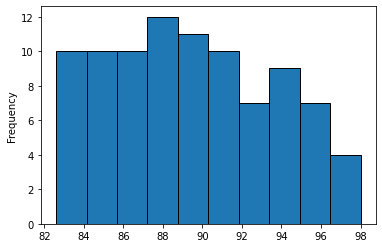

In [5]:
rendimentos_series = utils.ler_quadro_txt_como_serie("datasets/Atividade2-Exercicio3.txt")
hist = rendimentos_series.plot.hist(ec='black')


---
### 4) Considere o rendimento do processo químico do exercício anterior. Calcule a média amostral e o desvio padrão.

In [6]:
media = rendimentos_series.mean()
desvio_padrao = rendimentos_series.std()

Markdown(f'A média é {media:.2f} e o desvio padrão é {desvio_padrao:.2f}')

A média é 89.48 e o desvio padrão é 4.16

---
### 5) Suponha que dois dados não-viciados são lançados e uma variável aleatória observada, digamos X, que corresponde a soma das duas faces superiores. Descreva o espaço amostral do experimento e determine a função de probabilidade da v.a. X.

In [21]:
faces_dado = range(1,7)
dadoA = pd.DataFrame({"a": faces_dado, 'key': 1})
dadoB = pd.DataFrame({"b": faces_dado, 'key': 1})
combinacoes = pd.merge(dadoA, dadoB, on="key").drop(columns='key')
combinacoes["a,b"] = "(" + combinacoes.a.astype("str") + "," + combinacoes.b.astype("str") + ")"
combinacoes["soma"] = combinacoes.a + combinacoes.b

Markdown(
    f'O espaço amostral é: <br>'
    f'\Omega=\{{{combinacoes["a,b"].to_string(index=False)}\}}'
)


O espaço amostral é: <br>\Omega=\{(1,1)
(1,2)
(1,3)
(1,4)
(1,5)
(1,6)
(2,1)
(2,2)
(2,3)
(2,4)
(2,5)
(2,6)
(3,1)
(3,2)
(3,3)
(3,4)
(3,5)
(3,6)
(4,1)
(4,2)
(4,3)
(4,4)
(4,5)
(4,6)
(5,1)
(5,2)
(5,3)
(5,4)
(5,5)
(5,6)
(6,1)
(6,2)
(6,3)
(6,4)
(6,5)
(6,6)\}

In [8]:
quantidade_combinacoes = len(combinacoes)
possiveis_somas = combinacoes["soma"].unique()
quantidades_somas = combinacoes.groupby("soma").count()
distribuicao = pd.DataFrame({"X=x": possiveis_somas, "P(X=x)": quantidades_somas["a,b"] / quantidade_combinacoes})
distribuicao["P(X<=x)"] = distribuicao["P(X=x)"].cumsum()

distribuicao

,X=x,P(X=x),P(X<=x)
soma,,,
2,2,0.027778,0.027778
3,3,0.055556,0.083333
4,4,0.083333,0.166667
5,5,0.111111,0.277778
6,6,0.138889,0.416667
7,7,0.166667,0.583333
8,8,0.138889,0.722222
9,9,0.111111,0.833333
10,10,0.083333,0.916667


---
### 6) Ache a média e a variância da v.a. do exercício anterior.

In [9]:
media = sum(distribuicao["X=x"] * distribuicao["P(X=x)"])
variancia = sum( ((distribuicao["X=x"] ** 2) * distribuicao["P(X=x)"]) ) - (media ** 2)

Markdown(f'A média é {media:.2f} e a variância é {variancia:.2f}')

A média é 7.00 e a variância é 5.83

---
### 7) Calculadoras eletrônicas são classificadas ao final de um trabalho de inspeção. Três tipos de não conformidade podem ocorrer nas calculadoras: crítica, maior e menor. A experiência tem indicado que os defeitos ocorrem da maneira seguinte:

![Quadro](imagens/Atividade2-Exercicio7.png)

a. Qual a porcentagem da produção que estão de acordo com as especificações de projeto? <br>
b. Calculadoras que tem defeito crítico ou defeito crítico e outro tipo de defeito devem ser jogados fora. Qual a porcentagem da produção jogada fora? <br>
c. Calculadoras com defeito maior ou menor ou ambos devem ser consertados. Qual a porcentagem da produção sujeita a retrabalho?

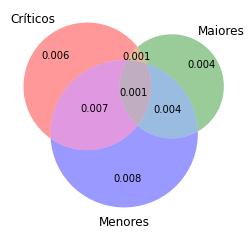

In [10]:
defeitos = {
    'criticos': .015,
    'maiores': .01,
    'menores': .02,
    'criticos_maiores': .002,
    'criticos_menores': .008,
    'maiores_menores': .005,
    'criticos_maiores_criticos_menores_maiores_menores': .001
}

def diff_defeito_areas_sobrepostas(defeitos, chave):
    diff = 0
    for k in defeitos.keys():
        if k == chave: diff += defeitos[chave]
        elif chave in k: diff -= diff_defeito_areas_sobrepostas(defeitos, k)
    return round(diff, 3)

defeitos_conjunto = (diff_defeito_areas_sobrepostas(defeitos, 'criticos'),
        diff_defeito_areas_sobrepostas(defeitos, 'maiores'),
        diff_defeito_areas_sobrepostas(defeitos, 'criticos_maiores'),
        diff_defeito_areas_sobrepostas(defeitos, 'menores'),
        diff_defeito_areas_sobrepostas(defeitos, 'criticos_menores'),
        diff_defeito_areas_sobrepostas(defeitos, 'maiores_menores'),
        diff_defeito_areas_sobrepostas(defeitos, 'criticos_maiores_criticos_menores_maiores_menores'))

v = venn3(subsets = defeitos_conjunto, set_labels = ('Críticos', 'Maiores', 'Menores'))

In [11]:
sem_defeito = (1 - sum(list(defeitos_conjunto))) * 100
com_defeito_critico = defeitos['criticos'] * 100
com_defeitos_maiores_ou_menores = (diff_defeito_areas_sobrepostas(defeitos, 'maiores') +
                                  diff_defeito_areas_sobrepostas(defeitos, 'menores') +
                                  diff_defeito_areas_sobrepostas(defeitos, 'maiores_menores')) * 100

Markdown(
    f'a. População sem defeito é de {sem_defeito:.2f}% <br>'
    f'b. Produção descartada por defeitos críticos é de {com_defeito_critico:.2f}% <br>'
    f'c. Produão que deve ser retrabalhada é de {com_defeitos_maiores_ou_menores:.2f}%'
)

a. População sem defeito é de 96.90% <br>b. Produção descartada por defeitos críticos é de 1.50% <br>c. Produão que deve ser retrabalhada é de 1.60%

---
### 8) A distribuição de probabilidade da v.a. contínua X tem a seguinte função densidade de probabilidade $$f_X (x) = k\exp(-kx) , 0 \le x \le \infty$$Ache a valor da constante k e também a média e a variância de X.

Como trata-se de uma função densidade de probabilidade, temos: $$\int_{0}^{b} k\exp(-kx) dx = 1 $$

In [12]:
exp_integration = integrate.quad(lambda x: np.exp(-x), 0, np.inf)
k = round(exp_integration[0] - exp_integration[1])
Markdown(
    f'Portanto, k = {k}, logo, a V.A. é: $$Exp(\lambda=1)$$'
    f'Logo, média = variância = {k}'
)

Portanto, k = 1, logo, a V.A. é: $$Exp(\lambda=1)$$Logo, média = variância = 1

---
### 9. A v.a. X assume os valores 1, 2, ou 3 com probabilidades (1+3k)/3, (1+2k)/3 e (0,5+5k)/3, respectivamente.
a. Determine o valor adequado de k. <br>
b. Determine a média e a variância de X. <br>
c. Determine a função distribuição acumulada de X.

In [13]:
x = [1, 2, 3]
px1 = lambda k: (1 + 3*k)/3
px2 = lambda k: (1 + 2*k)/3
px3 = lambda k: (.5 + 5*k)/3
chute_inicial_para_k = 1

k = optimize.root(lambda k: px1(k) + px2(k) + px3(k) - 1, chute_inicial_para_k)['x']
tabela_dist = pd.DataFrame(
    data= {"P(X=x)": [px1(k), px2(k), px3(k)],
           "P(X<=x)": [px1(k), px1(k) + px2(k), px1(k) + px2(k) + px3(k)]},
    index= x)
media = sum(tabela_dist["P(X=x)"] * tabela_dist.index)
variancia = sum(tabela_dist["P(X=x)"] * (tabela_dist.index ** 2)) - (media ** 2)

Markdown(
    f'a. K = {k.item():.3f} <br>'
    f'b. Média = {media.item():.3f}; Variância = {variancia.item():.3f} <br>'
    f'c. Função distribuição acumulada P(X<=x):')

tabela_dist

,P(X=x),P(X<=x)
1,[0.3833333333333333],[0.3833333333333333]
2,[0.36666666666666664],[0.75]
3,[0.24999999999999997],[1.0]


---
### 10. A distribuição de probabilidade de uma v.a. discreta é: $$p_{x}(x) = kr^x , 0 \le r \le 1 $$ Ache o valor adequado de k sabendo-se que o contradomínio de x é 0,1,2,...

Como trate-se de uma V.A., temos: $$ \sum_{n=0}^{\infty} kr^x = 1 $$

Desmembrando o somatório, temos: $$ k (r^0 + r^1 + r^2 + ...) = 1 $$

Dado 0<r<1, temos: $$ k ( \frac{1}{(1 - r)}) = 1 $$

Logo, $$ k = (1 - r) $$

---
### 11) Uma fábrica de calculadoras eletrônicas oferece garantia de um ano. Se a calculadora falha por qualquer razão neste período, ela é substituída. O tempo de falha é modelado pela seguinte distribuição de probabilidade $$ f_{X}(x) = 0,125e^{-0,125x} \therefore Exp(\lambda= 0,125)$$

a. Qual a porcentagem de calculadoras que falham no período da garantia? <br>
b. O custo de fabricação da calculadora é \$50 e o lucro é de \$25. Qual é o efeito da garantia de substituição sobre o lucro?

In [14]:
garantia = 1
custo = 50
lucro = 25
exp_lambda = .125
percentual_falhas = scipy_stats.expon.cdf(garantia, scale=1/exp_lambda) * 100
abatimento_lucro_falhas = (lucro * percentual_falhas)/custo

Markdown(
    f'a. O % de falhas na garantia é igual a {percentual_falhas:.2f}% <br>'
    f'b. O efeito da garantia sobre o lucro é de ${abatimento_lucro_falhas:.2f}'
)

a. O % de falhas na garantia é igual a 11.75% <br>b. O efeito da garantia sobre o lucro é de $5.88

---
### 12. A variabilidade do volume engarrafado de uma bebida está sendo analisada. Uma amostra com tamanho n= 10 foi tomada do processo. Os volumes medidos e os resultados são os seguintes, na unidade adequada:
    10,05 10,03 10,02 10,04 10,05 10,01 10,02 10,02 10,03 10,01
### Descreva a amostra.

In [15]:
amostra = utils.ler_quadro_txt_como_serie("datasets\Atividade2-Exercicio12.txt")
amostra.describe()

count    10.000000
mean     10.028000
std       0.014757
min      10.010000
25%      10.020000
50%      10.025000
75%      10.037500
max      10.050000
dtype: float64

---

### 13. Seja a v.a. X que representa o número de itens defeituosos presentes em uma amostra de tamanho n=10, tomada de um lote que possui 100 itens, inclusive 5 defeituosos. A amostra é tomada sem reposição. Calcule a probabilidade de aparecer na amostra no máximo 1 dos defeituosos.

In [16]:
n= 10
p= 5/100
max_defeituosos = 1
prob_max_defeituosos = scipy_stats.binom.cdf(max_defeituosos, n, p)

display(Markdown(f'A probabilidade de aparecer no máximo {max_defeituosos} dos defeituosos é de {(prob_max_defeituosos * 100):.2f}%'))

A probabilidade de aparecer no máximo 1 dos defeituosos é de 91.39%

---
### 14. Em um processo de produção de tecido aparecem determinado defeito com uma média de 4 defeitos por unidade de comprimento. Calcule probabilidade de em uma unidade de comprimento selecionada ao caso ocorrer no máximo 2 defeitos.

In [17]:
defeitos_por_unidade = 4
max_defeitos = 2
prob_max_defeitos = scipy_stats.poisson.cdf(max_defeitos, defeitos_por_unidade)

display(Markdown(f' A probabilidade de ocorrem no máximo 2 defeitos é de {(prob_max_defeitos * 100):.2f}%'))

 A probabilidade de ocorrem no máximo 2 defeitos é de 23.81%

---
### 15. A resistência a tração é uma característica muito importante do papel usada para fazer sacolas para carregar mantimentos. Supondo que a v.a. X represente esta força e que ela tem uma distribuição N(40, 4) para determinado tipo de papel e que a alça dessa sacola requer que a força de resistência seja de pelo menos 35 unidades, calcule a probabilidade de que uma sacola produzida com este papel atinja ou exceda a especificação.

In [18]:
media = 40
variancia = 4
spec = 35
prob_atinja_ou_exceda_spec = 1 - scipy_stats.norm.cdf(spec, media, math.sqrt(variancia))

Markdown(f'A probabilidade de atingir ou exceder a especificação é de {(prob_atinja_ou_exceda_spec * 100):.2f}%')

A probabilidade de atingir ou exceder a especificação é de 99.38%

---
### 16. O diâmetro do pino de metal usado em uma unidade de "disk-drive" é normalmente distribuída com média de 0,2508 e desvio-padrão de 0,0005 unidades. A especificação de projeto do pino estabeleceu que o diâmetro deve ficar entre 0,2500 e 0,0015 unidades. Determine a fração de defeituosos produzidos de acordo com a especificação.

In [ ]:
media = .2508
desvio_padrao = .0005
spec = .25
limite_spec = .0015
distribuicao = scipy_stats.norm(media, desvio_padrao)

prob_fora_spec = 1 - (distribuicao.cdf(spec + limite_spec) - distribuicao.cdf(spec - limite_spec))
Markdown(f'A fracao de defeituosos é {prob_fora_spec:.4f}')